In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#線形回帰分析ライブラリ読み込み
from sklearn.linear_model import LinearRegression
#ランダムフォレストライブラリ読み込み
from sklearn.ensemble import RandomForestRegressor
#グリッドサーチライブラリ読み込み
from sklearn.model_selection import GridSearchCV
#標準化ライブラリ読み込み
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [129]:
import datetime
import pandas_datareader.data as web

In [131]:
start = datetime.datetime(1970, 5, 16)
end   = datetime.datetime(2018, 6, 10)
df_nikkei = web.DataReader("SFTBF", "morningstar", start, end) 


df_nikkei.tail()

Close   High    Low   Open  Volume
Symbol Date                                          
SFTBF  2018-06-04  72.59  74.14  72.00  74.14    5108
       2018-06-05  73.20  73.81  72.69  73.81   11325
       2018-06-06  75.00  75.40  72.90  72.90    4194
       2018-06-07  74.60  75.70  74.25  74.25    3291
       2018-06-08  73.53  74.00  73.00  74.00    7481

In [6]:
df_nikkei.to_csv("softbank_stock.csv")

In [7]:
f_s = pd.read_csv("softbank_stock.csv")
f_s

,Symbol,Date,Close,High,Low,Open,Volume
0,SFTBF,2000-05-02,95.0000,103.3333,88.3333,NaN,39300
1,SFTBF,2000-05-03,83.3333,93.3333,80.0000,NaN,30000
2,SFTBF,2000-05-04,76.6667,85.0000,76.6667,NaN,14700
3,SFTBF,2000-05-05,85.0000,85.0000,76.6667,NaN,8700
4,SFTBF,2000-05-08,90.0000,90.0000,80.0000,NaN,22500
5,SFTBF,2000-05-09,78.3333,86.6667,75.0000,NaN,15000
6,SFTBF,2000-05-10,76.6667,80.0000,71.6667,NaN,13200
7,SFTBF,2000-05-11,73.3333,76.6667,63.3333,NaN,23400
8,SFTBF,2000-05-12,76.6667,76.6667,69.3333,NaN,10800
9,SFTBF,2000-05-15,71.6667,76.6667,66.6667,NaN,8100


In [86]:
y_train = f_s.loc[:, ['Close']]
y_train = y_train.shift(-1)
y_train = y_train.rename(columns={'Close': 'Close1'})
y_train = y_train.iloc[0:len(y_train)]
y_train

,Close1
0,83.3333
1,76.6667
2,85.0000
3,90.0000
4,78.3333
5,76.6667
6,73.3333
7,76.6667
8,71.6667
9,71.6667


In [23]:
#df_test = f_s.iloc[len(f_s)-1:len(f_s)]
#df_test

,Symbol,Date,Close,High,Low,Open,Volume
4723,SFTBF,2018-06-08,73.53,74.0,73.0,74.0,7481


In [87]:
x_train = f_s.iloc[0:len(f_s)]
x_train

,Symbol,Date,Close,High,Low,Open,Volume
0,SFTBF,2000-05-02,95.0000,103.3333,88.3333,NaN,39300
1,SFTBF,2000-05-03,83.3333,93.3333,80.0000,NaN,30000
2,SFTBF,2000-05-04,76.6667,85.0000,76.6667,NaN,14700
3,SFTBF,2000-05-05,85.0000,85.0000,76.6667,NaN,8700
4,SFTBF,2000-05-08,90.0000,90.0000,80.0000,NaN,22500
5,SFTBF,2000-05-09,78.3333,86.6667,75.0000,NaN,15000
6,SFTBF,2000-05-10,76.6667,80.0000,71.6667,NaN,13200
7,SFTBF,2000-05-11,73.3333,76.6667,63.3333,NaN,23400
8,SFTBF,2000-05-12,76.6667,76.6667,69.3333,NaN,10800
9,SFTBF,2000-05-15,71.6667,76.6667,66.6667,NaN,8100


In [88]:
df_s = pd.concat([x_train, y_train], axis=1)
df_s

,Symbol,Date,Close,High,Low,Open,Volume,Close1
0,SFTBF,2000-05-02,95.0000,103.3333,88.3333,NaN,39300,83.3333
1,SFTBF,2000-05-03,83.3333,93.3333,80.0000,NaN,30000,76.6667
2,SFTBF,2000-05-04,76.6667,85.0000,76.6667,NaN,14700,85.0000
3,SFTBF,2000-05-05,85.0000,85.0000,76.6667,NaN,8700,90.0000
4,SFTBF,2000-05-08,90.0000,90.0000,80.0000,NaN,22500,78.3333
5,SFTBF,2000-05-09,78.3333,86.6667,75.0000,NaN,15000,76.6667
6,SFTBF,2000-05-10,76.6667,80.0000,71.6667,NaN,13200,73.3333
7,SFTBF,2000-05-11,73.3333,76.6667,63.3333,NaN,23400,76.6667
8,SFTBF,2000-05-12,76.6667,76.6667,69.3333,NaN,10800,71.6667
9,SFTBF,2000-05-15,71.6667,76.6667,66.6667,NaN,8100,71.6667


In [89]:
#df_xの欠損値のあるカラムを探し出す

for i in df_s.columns:
    if sum(df_s[i].isnull())>0:
        print(i)

Open
Close1


In [90]:
df_s = df_s.drop("Open", axis=1)
df_s = df_s.drop("Symbol", axis=1)
df_s

,Date,Close,High,Low,Volume,Close1
0,2000-05-02,95.0000,103.3333,88.3333,39300,83.3333
1,2000-05-03,83.3333,93.3333,80.0000,30000,76.6667
2,2000-05-04,76.6667,85.0000,76.6667,14700,85.0000
3,2000-05-05,85.0000,85.0000,76.6667,8700,90.0000
4,2000-05-08,90.0000,90.0000,80.0000,22500,78.3333
5,2000-05-09,78.3333,86.6667,75.0000,15000,76.6667
6,2000-05-10,76.6667,80.0000,71.6667,13200,73.3333
7,2000-05-11,73.3333,76.6667,63.3333,23400,76.6667
8,2000-05-12,76.6667,76.6667,69.3333,10800,71.6667
9,2000-05-15,71.6667,76.6667,66.6667,8100,71.6667


In [91]:
#df_xの欠損値のあるカラムを探し出す

for i in df_s.columns:
    if sum(df_s[i].isnull())>0:
        print(i)

Close1


In [92]:
s = df_s['Date'].str.split('-', expand=True)
df_s = pd.concat([df_s, s], axis=1)

In [93]:
df_s = df_s.rename(columns={0: 'Year', 1: 'Month',2:'Day'})
df_s = df_s.drop('Date', axis=1)
df_s

,Close,High,Low,Volume,Close1,Year,Month,Day
0,95.0000,103.3333,88.3333,39300,83.3333,2000,05,02
1,83.3333,93.3333,80.0000,30000,76.6667,2000,05,03
2,76.6667,85.0000,76.6667,14700,85.0000,2000,05,04
3,85.0000,85.0000,76.6667,8700,90.0000,2000,05,05
4,90.0000,90.0000,80.0000,22500,78.3333,2000,05,08
5,78.3333,86.6667,75.0000,15000,76.6667,2000,05,09
6,76.6667,80.0000,71.6667,13200,73.3333,2000,05,10
7,73.3333,76.6667,63.3333,23400,76.6667,2000,05,11
8,76.6667,76.6667,69.3333,10800,71.6667,2000,05,12
9,71.6667,76.6667,66.6667,8100,71.6667,2000,05,15


In [94]:
df_s.astype(float)
df_s

,Close,High,Low,Volume,Close1,Year,Month,Day
0,95.0000,103.3333,88.3333,39300,83.3333,2000,05,02
1,83.3333,93.3333,80.0000,30000,76.6667,2000,05,03
2,76.6667,85.0000,76.6667,14700,85.0000,2000,05,04
3,85.0000,85.0000,76.6667,8700,90.0000,2000,05,05
4,90.0000,90.0000,80.0000,22500,78.3333,2000,05,08
5,78.3333,86.6667,75.0000,15000,76.6667,2000,05,09
6,76.6667,80.0000,71.6667,13200,73.3333,2000,05,10
7,73.3333,76.6667,63.3333,23400,76.6667,2000,05,11
8,76.6667,76.6667,69.3333,10800,71.6667,2000,05,12
9,71.6667,76.6667,66.6667,8100,71.6667,2000,05,15


In [95]:
#分析手法選択
clf =LinearRegression()

In [99]:
df_test = df_s.iloc[len(df_s)-1:len(df_s)]
df_test = df_test.drop('Close1', axis=1)
df_test

,Close,High,Low,Volume,Year,Month,Day
4723,73.53,74.0,73.0,7481,2018,06,08


In [100]:
df_x = df_s.loc[: , ['Close', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
df_x = df_x.iloc[0:len(df_s)-1]
df_x

,Close,High,Low,Volume,Year,Month,Day
0,95.0000,103.3333,88.3333,39300,2000,05,02
1,83.3333,93.3333,80.0000,30000,2000,05,03
2,76.6667,85.0000,76.6667,14700,2000,05,04
3,85.0000,85.0000,76.6667,8700,2000,05,05
4,90.0000,90.0000,80.0000,22500,2000,05,08
5,78.3333,86.6667,75.0000,15000,2000,05,09
6,76.6667,80.0000,71.6667,13200,2000,05,10
7,73.3333,76.6667,63.3333,23400,2000,05,11
8,76.6667,76.6667,69.3333,10800,2000,05,12
9,71.6667,76.6667,66.6667,8100,2000,05,15


In [104]:
df_y = df_s.loc[: , ['Close1']]
df_y = df_y.iloc[0:len(df_s)-1]
df_y

,Close1
0,83.3333
1,76.6667
2,85.0000
3,90.0000
4,78.3333
5,76.6667
6,73.3333
7,76.6667
8,71.6667
9,71.6667


In [105]:
#モデル作成
clf.fit(df_x,df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [107]:
#訓練データの予測結果RMSE
rmse(clf.predict(df_x),df_y)

1.1657681199469547

In [108]:
df_pre = clf.predict(df_x)
print(type(df_pre))

<class 'numpy.ndarray'>


In [109]:
df_pre = pd.DataFrame(df_pre)
df_pre = df_pre.rename(columns={0: 'Predict'})
df_pre

,Predict
0,94.075778
1,83.168716
2,76.933804
3,83.117888
4,87.810947
5,78.039683
6,75.664890
7,71.538196
8,74.985031
9,70.834949


In [110]:
df_s = pd.concat([df_s, df_pre], axis=1)
df_s

,Close,High,Low,Volume,Close1,Year,Month,Day,Predict
0,95.0000,103.3333,88.3333,39300,83.3333,2000,05,02,94.075778
1,83.3333,93.3333,80.0000,30000,76.6667,2000,05,03,83.168716
2,76.6667,85.0000,76.6667,14700,85.0000,2000,05,04,76.933804
3,85.0000,85.0000,76.6667,8700,90.0000,2000,05,05,83.117888
4,90.0000,90.0000,80.0000,22500,78.3333,2000,05,08,87.810947
5,78.3333,86.6667,75.0000,15000,76.6667,2000,05,09,78.039683
6,76.6667,80.0000,71.6667,13200,73.3333,2000,05,10,75.664890
7,73.3333,76.6667,63.3333,23400,76.6667,2000,05,11,71.538196
8,76.6667,76.6667,69.3333,10800,71.6667,2000,05,12,74.985031
9,71.6667,76.6667,66.6667,8100,71.6667,2000,05,15,70.834949


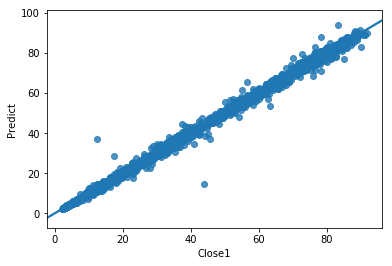

In [111]:
sns.regplot(x="Close1", y="Predict", data=df_s)

In [132]:
y_pred = clf.predict(df_test)

predict = y_pred[0]
pre_day = df_s.loc[:, ['Year', 'Month', 'Day']]
Year = pre_day.iloc[len(df_s)-1,0]
Month = pre_day.iloc[len(df_s)-1,1]
Day = pre_day.iloc[len(df_s)-1,2]
#pre_day

predict = predict*109.529025

print(str(Year)+"/"+str(Month)+"/"+str(Day)+"の株価予想は"+str(predict))

2018/06/08の株価予想は[ 8056.51341512]
